##  Introducing Python's Regex Module
You can find the full corpus here. But we'll start by learning basic regex commands using a few emails. If you'd like, you can use our [test file](https://www.dataquest.io/wp-content/uploads/2020/01/test_emails.txt) as well, or you can try this with the full corpus.
First, we'll prepare the data set by opening the test file, setting it to read-only, and reading it.

In [78]:
import pandas as pd
import email
import re
fh = open(r"test_emails.txt").read()

Notice that we precede the directory path with an r. This technique converts a string into a raw string, which helps to avoid conflicts caused by how some machines read characters, such as backslashes in directory paths on Windows.

Now, suppose we want to find out who the emails are from. We could try raw Python on its own:

In [79]:
for line in fh.split("n"):
    if "From:" in line:  # if there is someone in the line, output it
        print(line)

der.com>
Message-Id: <200210311310.g9VDANt24674@bloodwork.mr.itd.UM>
From: "Mr. Be
g_715@epatra.com>
Message-Id: <200210312227.g9VMQvDj017948@bluewhale.cs.CU>
From: "PRINCE OBONG ELEME" <obo


But that's not giving us exactly what we want. If you take a look at our test file, we could figure out why and fix it, but instead, let's use Python's re module and do it with regular expressions!

We'll start by importing Python's re module. Then, we'll use a function called re.findall() that returns a list of all instances of a pattern we define in the string we're looking at.

Here's how it looks:

In [80]:
for line in re.findall("From:.*", fh):
    sp = line
    print(type(sp))
    print(line)

<class 'str'>
From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
<class 'str'>
From: "PRINCE OBONG ELEME" <obong_715@epatra.com>


This is essentially the same length as our raw Python, but that's because it's a very simple example. The more you're trying to do, the more effort Python regex is likely to save you.

Before we move on, let's take a closer look at re.findall(). This function takes two arguments in the form of re.findall(pattern, string). Here, pattern represents the substring we want to find, and string represents the main string we want to find it in. The main string can consist of multiple lines. In this case, we're having it search through all of fh, the file with our selected emails.

The .* is a shorthand for a string pattern. Regular expressions work by using these shorthand patterns to find specific patterns in text, so let's take a look at some other common examples:

## Common Python Regex Patterns
The pattern we used with re.findall() above contains a fully spelled-out out string, "From:". This is useful when we know precisely what we're looking for, right down to the actual letters and whether or not they're upper or lower case. If we don't know the exact format of the strings we want, we'd be lost. Fortunately, regex has basic patterns that account for this scenario. Let's look at the ones we use in this tutorial:

- w matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also matches the underscore, _, and the dash, -.
- d matches digits, which means 0-9.
- s matches whitespace characters, which include the tab, new line, carriage return, and space characters.
- S matches non-whitespace characters.
- . matches any character except the new line character n.


With these regex patterns in hand, you'll quickly understand our code above as we go on to explain it.

### Working with Regex Patterns
We can now explain the use of .* in the line re.findall("From:.*", text) above. Let's look at . first:

In [81]:
for line in re.findall("From:.", fh):
    print(line)

From: 
From: 


By adding a . next to From:, we look for one additional character next to it. Because . looks for any character except n, it captures the space character, which we cannot see. We can try more dots to verify this.

In [82]:
for line in re.findall("From:...........", fh):
    print(line)

From: "Mr. Ben S
From: "PRINCE OB


It looks like adding dots does acquire the rest of the line for us. But, it's tedious and we don't know how many dots to add. This is where the asterisk symbol, *, comes in.

'*' matches zero or more instances of a pattern on its left. This means it looks for repeating patterns. When we look for repeating patterns, we say that our search is "greedy." If we don't look for repeating patterns, we can call our search "non-greedy" or "lazy."

Let's construct a greedy search for . with *.

In [83]:
for line in re.findall("From:.*", fh):
    print(line)

From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
From: "PRINCE OBONG ELEME" <obong_715@epatra.com>


Because * matches zero or more instances of the pattern indicated on its left, and . is on its left here, we are able to acquire all the characters in the From: field until the end of the line. This prints out the full line with beautifully succinct code.

We might even go further and isolate only the name. Let's use re.findall() to return a list of lines containing the pattern "From:.*" as we've done before. We'll assign it to the variable match for neatness. Next, we'll iterate through the list. In each cycle, we'll execute re.findall again, matching the first quotation mark to pick out just the name:

In [84]:
match = re.findall("From:.*", fh)

for line in match:
    print(re.findall('".*"', line))

['"Mr. Ben Suleman"']
['"PRINCE OBONG ELEME"']


Notice that we use a backslash next to the first quotation mark. The backslash is a special character used for escaping other special characters. For instance, when we want to use a quotation mark as a string literal instead of a special character, we escape it with a backslash like this: \". If we do not escape the pattern above with backslashes, it would become "".*"", which the Python interpreter would read as a period and an asterisk between two empty strings. It would produce an error and break the script. Hence, it's crucial that we escape the quotation marks here with backslashes.

After the first quotation mark is matched, .* acquires all the characters in the line until the next quotation mark, also escaped in the pattern. This gets us just the name, within quotation marks. The name is also printed within square brackets because re.findall returns matches in a list.

What if we want the email address instead?

In [85]:
match = re.findall("From:.*", fh)

for line in match:
    print(re.findall(r"\w\S*@.*", line))

['bensul2004nng@spinfinder.com>']
['obong_715@epatra.com>']


Looks simple enough, doesn't it? Only the pattern is different. Let's walk through it.

Here's how we match just the front part of the email address:

In [86]:
for line in match:
    print(re.findall(r"\w\S*@", line))

['bensul2004nng@']
['obong_715@']


Emails always contain an @ symbol, so we start with it. The part of the email before the @ symbol might contain alphanumeric characters, which means w is required. However, because some emails contain a period or a dash, that's not enough. We add S to look for non-whitespace characters. But, w\S will get only two characters. Add * to look for repetitions. The front part of the pattern thus looks like this: \w\S*@.

Now for the pattern behind the '@' symbol:

In [87]:
for line in match:
    print(re.findall("@.*", line))

['@spinfinder.com>']
['@epatra.com>']


The domain name usually contains alphanumeric characters, periods, and a dash sometimes, so a . will do. To make it greedy, we extend the search with a *. This allows us to match any character till the end of the line.

If we look at the line closely, we see that each email is encapsulated within angle brackets, < and >. Our pattern, .*, includes the closing bracket, >. Let's remedy it:

In [88]:
for line in match:
    print(re.findall(r"@.*\w", line))

['@spinfinder.com']
['@epatra.com']


Email addresses end with an alphanumeric character, so we cap the pattern with w. So, after the @ symbol we have .*\w, which means that the pattern we want is a group of any type of characters ending with an alphanumeric character. This excludes >.

Our full email address pattern thus looks like this: \w\S*@.*\w.

Phew! That was quite a bit to work through. Next, we'll run through some common re functions that will be useful when we start reorganizing our corpus.

## Common Python Regex Functions
re.findall() is undeniably useful, but it's not the only built-in function that's available to us in re:

- re.search()
- re.split()
- re.sub()
Let's look at these one by one before using them to bring some order to our data set.

### re.search()
While re.findall() matches all instances of a pattern in a string and returns them in a list, re.search() matches the first instance of a pattern in a string, and returns it as a re match object.

In [89]:
match = re.search("From:.*", fh)
print(type(match))
print(type(match.group()))
print(match)
print(match.group())

<class 're.Match'>
<class 'str'>
<re.Match object; span=(204, 258), match='From: "Mr. Ben Suleman" <bensul2004nng@spinfinder>
From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>


Like re.findall(), re.search() also takes two arguments. The first is the pattern to match, and the second is the string to find it in. Here, we've assigned the results to the match variable for neatness.

Because re.search() returns a re match object, we can't display the name and email address by printing it directly. Instead, we have to apply the group() function to it first. We've printed both their types out in the code above. As we can see, group() converts the match object into a string.

We can also see that printing match displays properties beyond the string itself, whereas printing match.group() displays only the string.

### re.split()

Suppose we need a quick way to get the domain name of the email addresses. We could do it with three regex operations, like so:


In [90]:
address = re.findall("From:.*", fh)
for item in address:
    for line in re.findall(r"\w\S*@.*\w", item):
        username, domain_name = re.split("@", line)
        print("{}, {}".format(username, domain_name))

bensul2004nng, spinfinder.com
obong_715, epatra.com


The first line is familiar. We return a list of strings, each containing the contents of the From: field, and assign it to a variable. Next, we iterate through the list to find the email addresses. At the same time, we iterate through the email addresses and use the re module's split() function to snip each address in half, with the @ symbol as the delimiter. Finally, we print it.

### re.sub()

Another handy re function is re.sub(). As the function name suggests, it substitutes parts of a string. An example:

In [91]:
sender = re.search("From:.*", fh)
address = sender.group()
email = re.sub("From", "Email", address)
print(address)
print(email)

From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
Email: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>


We've already seen the tasks on the first and second lines before. On the third line, we apply re.sub() on address, which is the full From: field in the email header.

re.sub() takes three arguments. The first is the substring to substitute, the second is a string we want in its place, and the third is the main string itself.

## Regex with Pandas

Now we have the basics of Python regex in hand. But often for data tasks, we're not actually using raw Python, we're using the pandas library. Now let's take our regex skills to the next level by bringing them into a pandas workflow.

### Sorting Emails with Python Regex and Pandas
Our corpus is a single text file containing thousands of emails (though again, for this tutorial we're using a much smaller file with just two emails, since printing the results of our regex work on the full corpus would make this post far too long).

We'll use regex and pandas to sort the parts of each email into appropriate categories so that the Corpus can be more easily read or analysed.

We'll sort each email into the following categories:

- sender_name
- sender_address
- recipient_address
- recipient_name
- date_sent
- subject
- email_body

Each of these categories will become a column in our pandas dataframe (i.e., our table). This will make it easier for us work on and analyze each column individually.

We'll keep working with our small sample, but it's worth reiterating that regular expressions allow us to write more concise code. Concise code reduces the number of operations our machines have to do, which speeds up our analytical process. Working with our small file of two emails, there's not much difference, but if you try processing the entire corpus with and without regex, you'll start to see the advantages!

### Preparing the Script
To start, let's import the libraries we'll need and get our file opened again.

In addition to re and pandas, we'll import Python's email package as well, which will help with the body of the email. The body of the email is rather complicated to work with using regex alone. It might even require enough cleaning up to warrant its own tutorial. So, we'll use the well-developed email package to save some time and let us focus on learning regex.

In [92]:
emails = []

fh = open(r"test_emails.txt").read()

We've also created an empty list, emails, which will store dictionaries. Each dictionary will contain the details of each email.

Now, let's begin applying regex!

In [93]:
contents = re.split(r"From r", fh)
contents.pop(0)
contents

['  Thu Oct 31 08:11:39 2002\nReturn-Path: <bensul2004nng@spinfinder.com>\nX-Sieve: cmu-sieve 2.0\nReturn-Path: <bensul2004nng@spinfinder.com>\nMessage-Id: <200210311310.g9VDANt24674@bloodwork.mr.itd.UM>\nFrom: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>\nDate: Thu, 31 Oct 2002 05:10:00\nTo: R@M\nSubject: URGENT ASSISTANCE /RELATIONSHIP (P)\nMIME-Version: 1.0\nContent-Type: text/plain;charset="iso-8859-1"\nContent-Transfer-Encoding: 7bit\nStatus: O\n\nDear Friend,\n\nI am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.\n\nAfter the sudden death of the former Head of state of Nigeria General Sanni Abacha on June 8th 1998 his aides and immediate members of his family were arrested while trying to escape from Nigeria in a Chartered jet to Saudi Arabia with 6 trunk boxes Marked "Diplomatic Baggage". Acting on 

Note: we cut off the printout above for the sake of brevity. If you print this on your own machine, it will display everything that's contained in contents rather than ending with ... like it does above.

We use the re module's split function to split the entire chunk of text in fh into a list of separate emails, which we assign to the variable contents. This is important because we want to work on the emails one by one, by iterating through the list with a for loop. But, how do we know to split by the string "From r"?

We know this because we looked into the file before we wrote the script. We didn't have to peruse the thousands of emails in there. Just the first few, to see what the structure of the data looks like. Whenever possible, it's good to get your eyes on the actual data before you start working with code, as you'll often discover useful features like this.

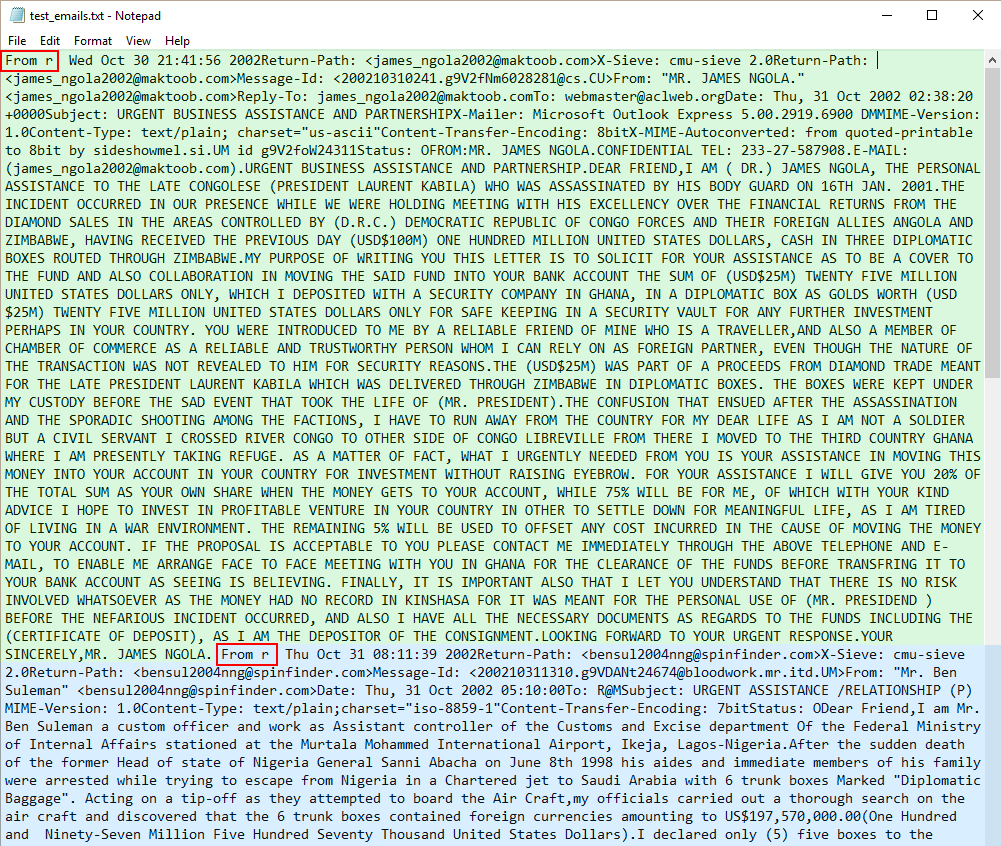

The green block is the first email. The blue block is the second email. As we can see, both emails start with "From r", highlighted with red boxes.

One reason we use the Fraudulent Email Corpus in this tutorial is to show that when data is disorganized, unfamiliar, and comes without documentation, we can't rely solely on code to sort it out. It would require a pair of human eyes. As we've just shown, we had to look into the corpus itself to study its structure.

Disorganized data like this may require a lot of cleaning up. For instance, even though we count 3,977 emails in this set using the full script we're about to construct for this tutorial, there are actually more. Some emails actually are not preceded by "From r", and so are not counted separately. (However, for the purposes of brevity, we'll proceed as if that issue has already been fixed and all emails are separated by "From r".)

Notice also that we use contents.pop(0) to get rid of the first element in the list. That's because a "From r" string precedes the first email. When that string is split, it produces an empty string at index 0. The script we're about to write is designed for emails. If we try to use it on an empty string, it might throw errors. Getting rid of the empty string lets us keep these errors from breaking our script.

### Getting Every Name and Address With a For Loop

Next, we'll work with the emails in the contents list.

In [94]:
for item in contents:
    emails_dict = {}

In the code above, we use a for loop to iterate through contents so we can work with each email in turn. We create a dictionary, emails_dict, that will hold all the details of each email, such as the sender's address and name. In fact, these are the first items we find.

This is a three-step process. It begins by finding the From: field.

In [95]:
for item in contents:
    # First two lines again so that Jupyter runs the code.
    emails_dict = {}

    # Find sender's email address and name.

    # Step 1: find the whole line beginning with "From:".
    sender = re.search(r"From:.*", item)

With Step 1, we find the entire From: field using the re.search() function. The . means any character except n, and * extends it to the end of the line. We then assign this to the variable sender.

But, data isn't always straightforward. It can contain surprises. For instance, what if there's no From: field? The script would throw an error and break. We pre-empt errors from this scenario in Step 2.

In [96]:
for item in contents:
    # First two lines again so that Jupyter runs the code.
    emails_dict = {}

    # Find sender's email address and name.

    # Step 1: find the whole line beginning with "From:".
    sender = re.search(r"From:.*", item)
    # Step 2: find the email address and name.
    if sender is not None:
        s_email = re.search(r"\w\S*@.*\w", sender.group())
        s_name = re.search(r":.*<", sender.group())
    else:
        s_email = None
        s_name = None

To avoid errors resulting from missing From: fields, we use an if statement to check that sender isn't None. If it is, we assign s_email and s_name the value of None so that the script can move on instead of breaking unexpectedly.

If you're working along with this tutorial in your own file, you've probably already realized that working with regular expressions gets messy. For instance, these if-else statements are the result of using trial and error on the corpus while writing it. Writing code is an iterative process. It's worth noting that even if this tutorial is making it seem straightforward, actual practice involves a lot more experimentation.

In Step 2, we use a familiar regex pattern from before, \w\S*@.*\w, which matches the email address.

We'll use a different tactic for the name. Each name is bounded by the colon, :, of the substring "From:" on the left, and by the opening angle bracket, <, of the email address on the right. Hence, we use :.*< to find the name. We get rid of : and < from each result in a moment.

Now, let's print out the results of our code to see how they look.

In [97]:
print("sender type: " + str(type(sender)))
print("sender.group() type: " + str(type(sender.group())))
print("sender: " + str(sender))
print("sender.group(): " + str(sender.group()))
print("n")

sender type: <class 're.Match'>
sender.group() type: <class 'str'>
sender: <re.Match object; span=(180, 229), match='From: "PRINCE OBONG ELEME" <obong_715@epatra.com>>
sender.group(): From: "PRINCE OBONG ELEME" <obong_715@epatra.com>
n


Again, we have match objects. Every time we apply re.search() to strings, it produces match objects. We have to turn them into string objects.

Before we do this, recall that if there is no From: field, sender would have the value of None, and so too would s_email and s_name. Hence, we have to check for this scenario again so that the script doesn't break unexpectedly. Let's see how to construct the code with s_email first.

In [98]:
for item in contents:
    # First two lines again so that Jupyter runs the code.
    emails_dict = {}

    # Find sender's email address and name.

    # Step 1: find the whole line beginning with "From:".
    sender = re.search(r"From:.*", item)
    # Step 2: find the email address and name.
    if sender is not None:
        s_email = re.search(r"\w\S*@.*\w", sender.group())
        s_name = re.search(r":.*<", sender.group())
    else:
        s_email = None
        s_name = None
# Step 3A: assign email address as string to a variable.
if s_email is not None:
    sender_email = s_email.group()
else:
    sender_email = None
# Add email address to dictionary.
emails_dict["sender_email"] = sender_email

In Step 3A, we use an if statement to check that s_email is not None, otherwise it would throw an error and break the script.

Then, we simply convert the s_email match object into a string and assign it to the sender_email variable. We add this to the emails_dict dictionary, which will make it incredibly easy for us to turn the details into a pandas dataframe later on.

We do almost exactly the same for s_name in Step 3B.

In [99]:
# Step 3B: remove unwanted substrings, assign to variable.
if s_name is not None:
    sender_name = re.sub("s*<", "", re.sub(":s*", "", s_name.group()))
else:
    sender_name = None

# Add sender's name to dictionary.
emails_dict["sender_name"] = sender_name

Just as we did before, we first check that s_name isn't None in Step 3B.

Then, we use the re module's re.sub() function twice before assigning the string to a variable. First, we remove the colon and any whitespace characters between it and the name. We do this by substituting :s* with an empty string "". Then, we remove whitespace characters and the angle bracket on the other side of the name, again substituting it with an empty string. Finally, after assigning the string to sender_name, we add it to the dictionary.

Let's check out our results.

In [100]:
print(sender_email)
print(sender_name)

obong_715@epatra.com
 "PRINCE OBONG ELEME" 


Perfect. We've isolated the email address and the sender's name. We've also added them to the dictionary, which will come into play soon.

Now that we've found the sender's email address and name, we do exactly the same set of steps to acquire the recipient's email address and name for the dictionary.

First, we find the the To: field.

In [101]:
recipient = re.search(r"To:.*", item)

Next, we pre-empt the scenario where recipient is None.



In [102]:
if recipient is not None:
    r_email = re.search(r"wS*@.*w", recipient.group())
    r_name = re.search(r":.*<", recipient.group())
else:
    r_email = None
    r_name = None

If recipient isn't None, we use re.search() to find the match object containing the email address and the recipient's name. Otherwise, we pass r_email and r_name the value of None.

Then, we turn the match objects into strings and add them to the dictionary.

In [103]:
if r_email is not None:
    recipient_email = r_email.group()
else:
    recipient_email = None

emails_dict["recipient_email"] = recipient_email

if r_name is not None:
    recipient_name = re.sub(r"\s*<", "", re.sub(r":\s*", "", r_name.group()))
else:
    recipient_name = None

emails_dict["recipient_name"] = recipient_name

Because the structure of the From: and To: fields are the same, we can use the same code for both. We need to tailor slightly different code for the other fields.

### Getting the Date of the Email

Now for the date the email was sent.

In [104]:
for item in contents:
    # First two lines again so that Jupyter runs the code.
    emails_dict = {}

    date_field = re.search(r"Date:.*", item)

We acquire the Date: field with the same code for the From: and To: fields.

And, just as we do for those two fields, we check that the Date: field, assigned to the date_field variable, is not None.

In [105]:
if date_field is not None:
    date = re.search(r"\d+\s\w+\s\d+", date_field.group())
else:
    date = None

print(date_field.group())

Date: Thu, 31 Oct 2002 22:17:55 +0100


We've printed out date_field.group() so that we can see the structure of the string more clearly. It includes the day, the date in DD MMM YYYY format, and the time. We want just the date. The code for the date is largely the same as for names and email addresses but simpler. Perhaps the only puzzler here is the regex pattern, \d+\s\w+\s\d+.

The date starts with a number. Hence, we use d to account for it. However, as the DD part of the date, it could be either one or two digits. Here is where + becomes important. In Python regex, + matches 1 or more instances of a pattern on its left. d+ would thus match the DD part of the date no matter if it is one or two digits.

After that, there's a space. This is accounted for by s, which looks for whitespace characters. The month is made up of three alphabetical letters, hence w+. Then it hits another space, s. The year is made up of numbers, so we use d+ once more.

The full pattern, \d+\s\w+\s\d+, works because it is a precise pattern bounded on both sides by whitespace characters.

Next, we do the same check for a value of None as before.

In [109]:
if date is not None:
    date_sent = date.group()
    # date_star = date_star_test.group()
else:
    date_sent = None

emails_dict["date_sent"] = date_sent

{'date_sent': '31 Oct 2002'}

If date is not None, we turn it from a match object into a string and assign it to the variable date_sent. We then insert it into the dictionary.

Before we go on, we should note a crucial point. + and * seem similar but they can produce very different results. Let's use the date string here as an example.

In [ ]:
date = re.search(r"\d+\s\w+\s\d+", date_field.group())

# What happens when we use * instead?
date_star_test = re.search(r"\d*\s\w*\s\d*", date_field.group())

date_sent = date.group()
date_star = date_star_test.group()

print(date_sent)
print(date_star)

If we use *, we'd be matching zero or more occurrences. + matches one or more occurrences. We've printed the results for both scenarios. It's a big difference. As you can see, + acquires the full date whereas * gets a space and the digits 31.

Next up, the subject line of the email.

### Getting the Email Subject

As before, we use the same code and code structure to acquire the information we need.

In [110]:
for item in contents:
    # First two lines again so that Jupyter runs the code.
    emails_dict = {}

    subject_field = re.search(r"Subject: .*", item)

    if subject_field is not None:
        subject = re.sub(r"Subject: ", "", subject_field.group())
    else:
        subject = None

    emails_dict["subject"] = subject

We're becoming more familiar with the use of Python regex now, aren't we? It's largely the same code as before, except that we substitute "Subject: " with an empty string to get only the subject itself.

### Getting the Body of the Email

The last item to insert into our dictionary is the body of the email

In [111]:
full_email = email.message_from_string(item)
body = full_email.get_payload()
emails_dict["email_body"] = body

Separating the header from the body of an email is an awfully complicated task, especially when many of the headers are different in one way or another. Consistency is seldom found in raw unorganised data. Luckily for us, the work's already been done. Python's email package is highly adept at this task.

Remember that we've already imported the package earlier. Now, we apply its message_from_string() function to item, to turn the full email into an email Message object. A Message object consists of a header and a payload, which correspond to the header and body of an email.

Next, we apply its get_payload() function on the Message object. This function isolates the body of the email. We assign it to the variable body, which we then insert into our emails_dict dictionary under the key "email_body".

**Why the Email Package and Not Regex for the Body**

You may ask, why use the email Python package rather than regex? This is because there's no good way to do it with Python regex at the moment that doesn't require significant amounts of cleaning up. It would mean another sheet of code that probably deserves its own tutorial.

It's worth checking out how we arrive at decisions like this one. However, we need to understand what square brackets, [ ], mean in regex before we can do that.

[ ] match any character placed inside them. For instance, if we want to find "a", "b", or "c" in a string, we can use [abc] as the pattern. The patterns we discussed above apply as well. [\w\s] would find either alphanumeric or whitespace characters. The exception is ., which becomes a literal period within square brackets.

Now, we can better understand how we made the decision to use the email package instead.

A peek at the data set reveals that email headers stop at the strings "Status: 0" or "Status: R0", and end before the string "From r" of the next email. We could thus use Status:\s*\w*\n*[\s\S]*From\sr* to acquire only the email body. [\s\S]* works for large chunks of text, numbers, and punctuation because it searches for either whitespace or non-whitespace characters.

Unfortunately, some emails have more than one "Status:" string and others don't contain "From r", which means that we would split the emails into more or less than the number of dictionaries in the emails list. They would not match with the other categories we already have. This will create problems when working with pandas. Hence, we decided to leverage the email package.

### Create the List of Dictionaries
Finally, append the dictionary, emails_dict, to the emails list:

In [112]:
emails.append(emails_dict)

We might want to print the emails list at this point to see how it looks. This will be pretty anti-climactic if you've just been using our little sample file, but with the entire corpus you'll see the power of regular expressions!

We could also run print(len(emails_dict)) to see how many dictionaries, and therefore emails, are in the list. As we mentioned before, the full corpus contains 3,977.

In [114]:
emails = []

fh = open(r"test_emails.txt").read()

contents = re.split(r"From r", fh)
contents.pop(0)

for item in contents:
    emails_dict = {}

    sender = re.search(r"From:.*", item)

    if sender is not None:
        s_email = re.search(r"\w\S*@.*\w", sender.group())
        s_name = re.search(r":.*<", sender.group())
    else:
        s_email = None
        s_name = None

    if s_email is not None:
        sender_email = s_email.group()
    else:
        sender_email = None

    emails_dict["sender_email"] = sender_email

    if s_name is not None:
        sender_name = re.sub(r"\s*<", "", re.sub(r":\s*", "", s_name.group()))
    else:
        sender_name = None

    emails_dict["sender_name"] = sender_name

    recipient = re.search(r"To:.*", item)

    if recipient is not None:
        r_email = re.search(r"\w\S*@.*\w", recipient.group())
        r_name = re.search(r":.*<", recipient.group())
    else:
        r_email = None
        r_name = None

    if r_email is not None:
        recipient_email = r_email.group()
    else:
        recipient_email = None
    emails_dict["recipient_email"] = recipient_email

    if r_name is not None:
        recipient_name = re.sub("s*<", "", re.sub(":s*", "", r_name.group()))
    else:
        recipient_name = None

    emails_dict["recipient_name"] = recipient_name

    date_field = re.search(r"Date:.*", item)

    if date_field is not None:
        date = re.search(r"\d+\s\w+\s\d+", date_field.group())
    else:
        date = None

    if date is not None:
        date_sent = date.group()
    else:
        date_sent = None

    emails_dict["date_sent"] = date_sent

    subject_field = re.search(r"Subject: .*", item)

    if subject_field is not None:
        subject = re.sub(r"Subject: ", "", subject_field.group())
    else:
        subject = None

    emails_dict["subject"] = subject

    # "item" substituted with "email content here" so full email not
    # displayed.

    full_email = email.message_from_string(item)
    body = full_email.get_payload()
    emails_dict["email_body"] = "email body here"

    emails.append(emails_dict)
# Print number of dictionaries, and hence, emails, in the list.
print("Number of emails: " + str(len(emails_dict)))

print("n")

# Print first item in the emails list to see how it looks.
for key, value in emails[0].items():
    print(str(key) + ": " + str(emails[0][key]))

Number of emails: 7
n
sender_email: bensul2004nng@spinfinder.com
sender_name: "Mr. Ben Suleman"
recipient_email: R@M
recipient_name: None
date_sent: 31 Oct 2002
subject: URGENT ASSISTANCE /RELATIONSHIP (P)
email_body: email body here


We've printed out the first item in the emails list, and it's clearly a dictionary with key and value pairs. Because we used a for loop, every dictionary has the same keys but different values.

We've substituted item with "email content here" so that we don't print out the entire mass of the email and clog up our screens. If you're printing this at home using the actual data set, you'll see the entire email.

## Manipulating Data with Pandas

With dictionaries in a list, we've made it infinitely easy for the pandas library to do its job. Each key will become a column title, and each value becomes a row in that column.

All we have to do is apply the following code:

In [115]:
# Module imported above, imported again as reminder.
emails_df = pd.DataFrame(emails)
emails_df

,sender_email,sender_name,recipient_email,recipient_name,date_sent,subject,email_body
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",R@M,None,31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),email body here
1,obong_715@epatra.com,"""PRINCE OBONG ELEME""",obong_715@epatra.com,None,31 Oct 2002,GOOD DAY TO YOU,email body here


With this single line, we turn the emails list of dictionaries into a dataframe using the pandas DataFrame() function. We assign it to a variable too.

That's it. We now have a sophisticated pandas dataframe. This is essentially a neat and clean table containing all the information we've extracted from the emails.

Let's look at the first few rows.

In [116]:
pd.DataFrame.head(emails_df, n=3)

,sender_email,sender_name,recipient_email,recipient_name,date_sent,subject,email_body
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",R@M,None,31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),email body here
1,obong_715@epatra.com,"""PRINCE OBONG ELEME""",obong_715@epatra.com,None,31 Oct 2002,GOOD DAY TO YOU,email body here


The dataframe.head() function displays just the first few rows rather than the entire data set. It takes one argument. An optional argument allows us to specify how many rows we want displayed. Here, n=3 lets us view three rows.

We can also find precisely what we want. For instance, we can find all the emails sent from a particular domain name. However, let's learn a new regex pattern to improve our precision in finding the items we want.

The pipe symbol, |, looks for characters on either side of itself. For instance, a|b looks for either a or b.

| might seem to do the same as [ ], but they really are different. Suppose we want to match either "crab", "lobster", or "isopod". Using crab|lobster|isopod would make more sense than [crablobsterisopod], wouldn't it? The former would look for each whole word, whereas the latter would look for every single letter.

Now, let's use | to find all the emails sent from one or another domain name.

In [117]:
emails_df[emails_df["sender_email"].str.contains("epatra|spinfinder")]

,sender_email,sender_name,recipient_email,recipient_name,date_sent,subject,email_body
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",R@M,None,31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),email body here
1,obong_715@epatra.com,"""PRINCE OBONG ELEME""",obong_715@epatra.com,None,31 Oct 2002,GOOD DAY TO YOU,email body here


We've used a rather lengthy line of code here. Let's start from the inside out.

emails_df['sender_email'] selects the column labelled sender_email. Next, str.contains(epatra|spinfinder) returns True if the substring "epatra" or "spinfinder" is found in that column. Finally, the outer emails_df[] returns a view of the rows where the sender_email column contains the target substrings. Nifty!

We can view emails from individual cells too. To do this, we go through four steps. In Step 1, we find the index of the row where the "sender_email" column contains the string "@spinfinder". Notice how we use regex to do this.

In [118]:
# Step 1: find the index where the "sender_email" column contains "@spinfinder.com".
index = emails_df[emails_df["sender_email"].str.contains(
    r"\w\S*@spinfinder.com")].index.values

In Step 2, we use the index to find the email address, which the loc[] method returns as a Series object with several different properties. We print it out below to see what it looks like.

In [119]:
# Step 2: use the index to find the value of the cell i the "sender_email" column.
# The result is returned as pandas Series object
address_Series = emails_df.loc[index]["sender_email"]
print(address_Series)
print(type(address_Series))

0    bensul2004nng@spinfinder.com
Name: sender_email, dtype: object
<class 'pandas.core.series.Series'>


In Step 3, we extract the email address from the Series object as we would items from a list. You can see that its type is now class.

In [120]:
# Step 3: extract the email address, which is at index 0 in the Series object.
address_string = address_Series[0]
print(address_string)
print(type(address_string))

bensul2004nng@spinfinder.com
<class 'str'>


Step 4 is where we extract the email body.

In [121]:
# Step 4: find the value of the "email_body" column where the "sender email" column is address_string.
print(emails_df[emails_df["sender_email"] == address_string]
      ["email_body"].values)

['email body here']


In Step 4, emails_df['sender_email'] == "bensul2004nng@spinfinder.com" finds the row where the sender_email column contains the value "bensul2004nng@spinfinder.com". Next, ['email_body'].values finds the value of the email_body column in that same row. Finally, we print out the value.

As you can see, we can work with regex in many ways, and it plays well with pandas, too! Don't be discouraged if your regex work includes a lot of trial and error, especially when you're just getting started!